In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.model_selection import KFold 

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
sns.set()

In [8]:
df = pd.read_csv('diabetes.csv')

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


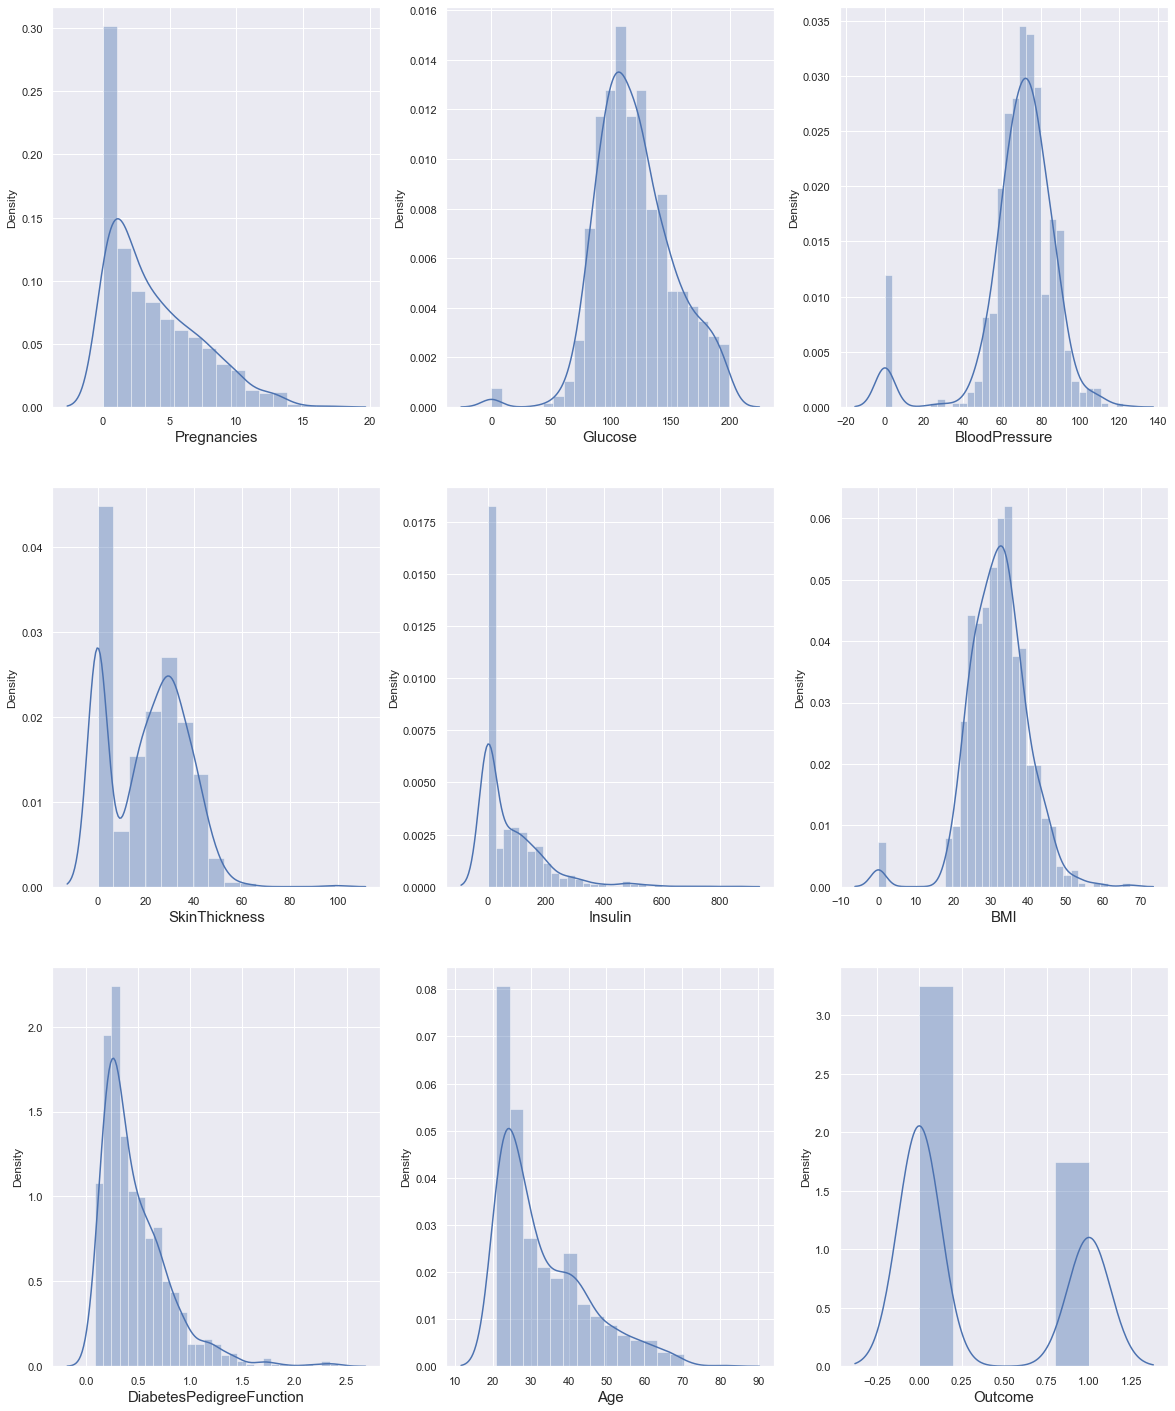

In [11]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,25), facecolor='white')


plotnumber = 1

for col in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show()

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
df['Glucose'].replace(0,df['Glucose'].mean(),inplace=True)
df['BloodPressure'].replace(0,df['BloodPressure'].mean(),inplace=True)
df['BloodPressure'].replace(0,df['BloodPressure'].mean(),inplace=True)
df['Insulin'].replace(0,df['Insulin'].mean(),inplace=True)
df['BMI'].replace(0,df['BMI'].mean(),inplace=True)

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,20.536458,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,15.952218,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

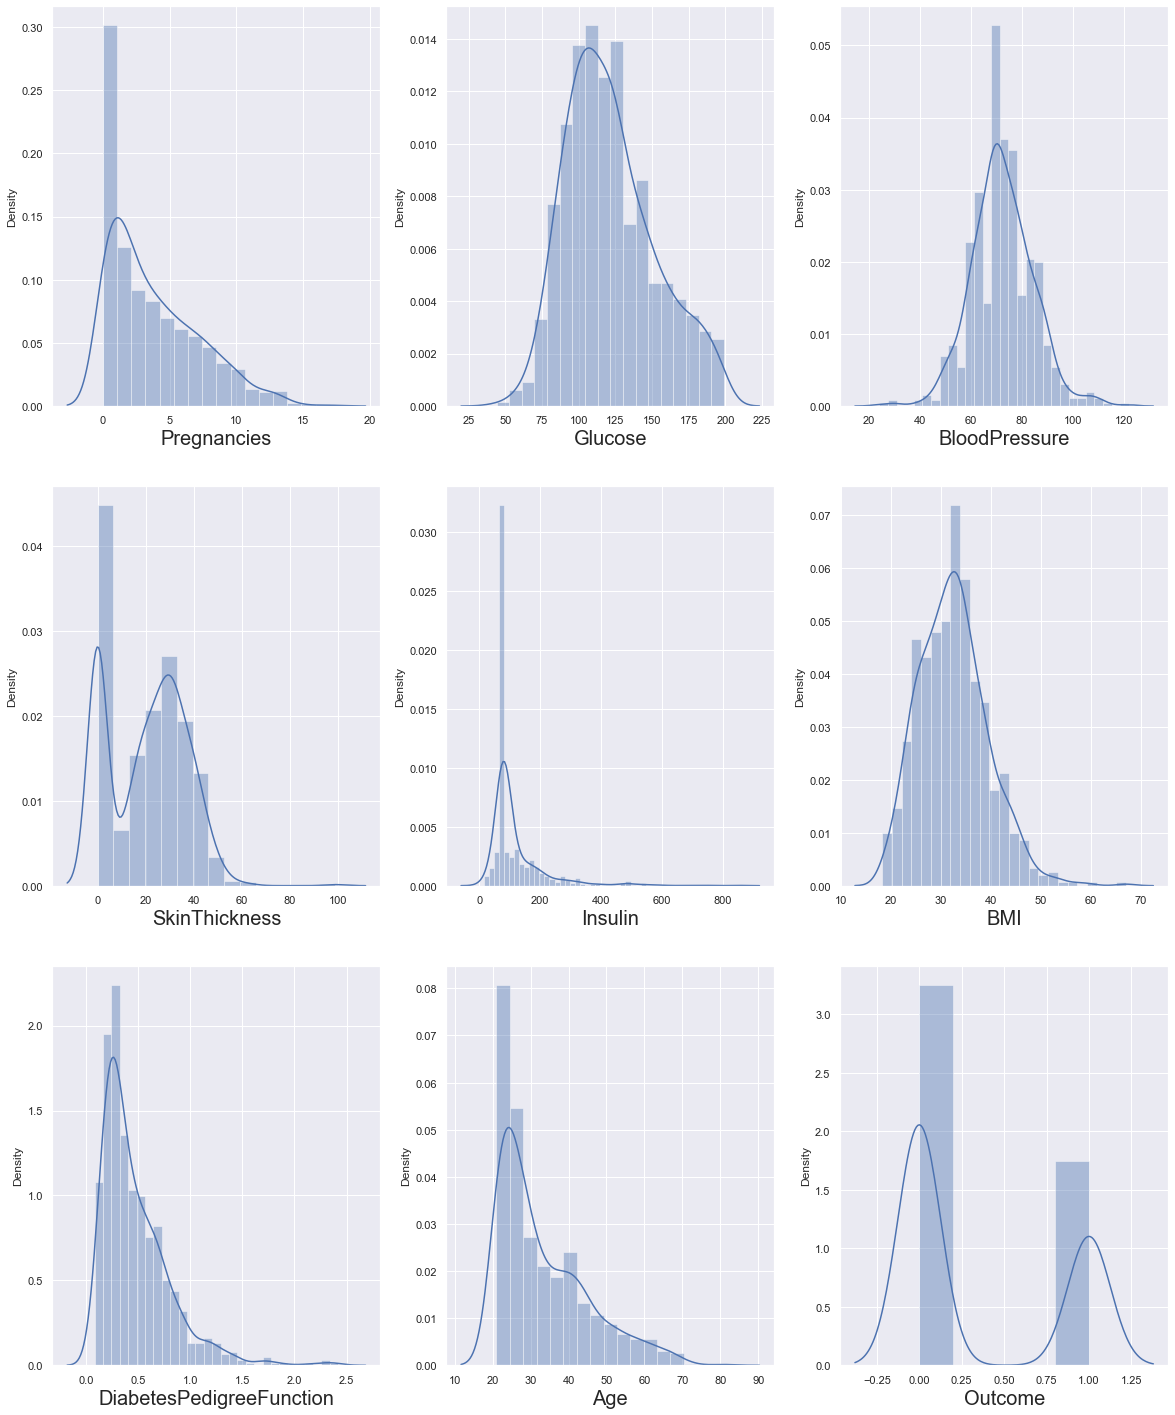

In [17]:
plt.figure(figsize=(20,25))

number = 1

for col in df:
    if number<=9:
        ax = plt.subplot(3,3,number)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 20)
    number+=1
plt.show

<AxesSubplot:>

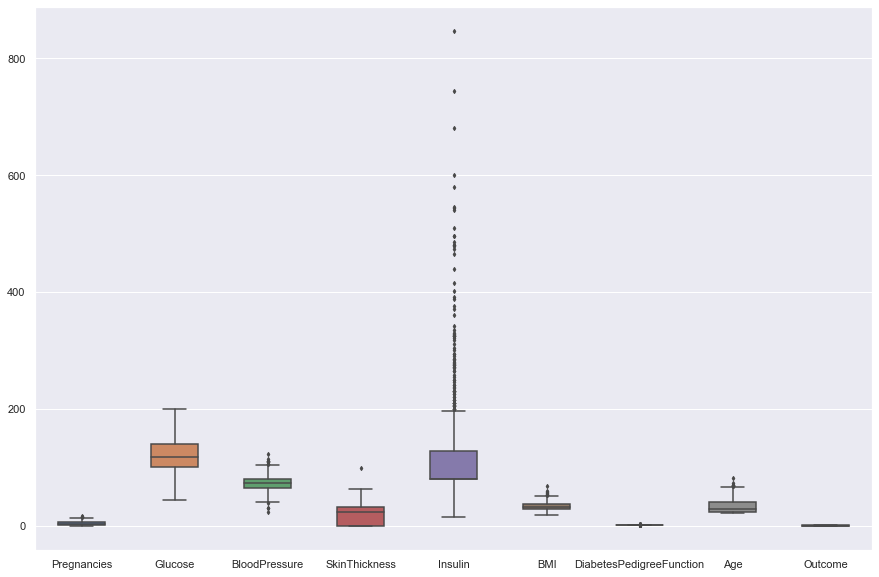

In [18]:
fig,ax= plt.subplots(figsize = (15,10))

sns.boxplot(data=df, ax = ax, fliersize=3,width=0.5)

In [19]:
q = df['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = df[df['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

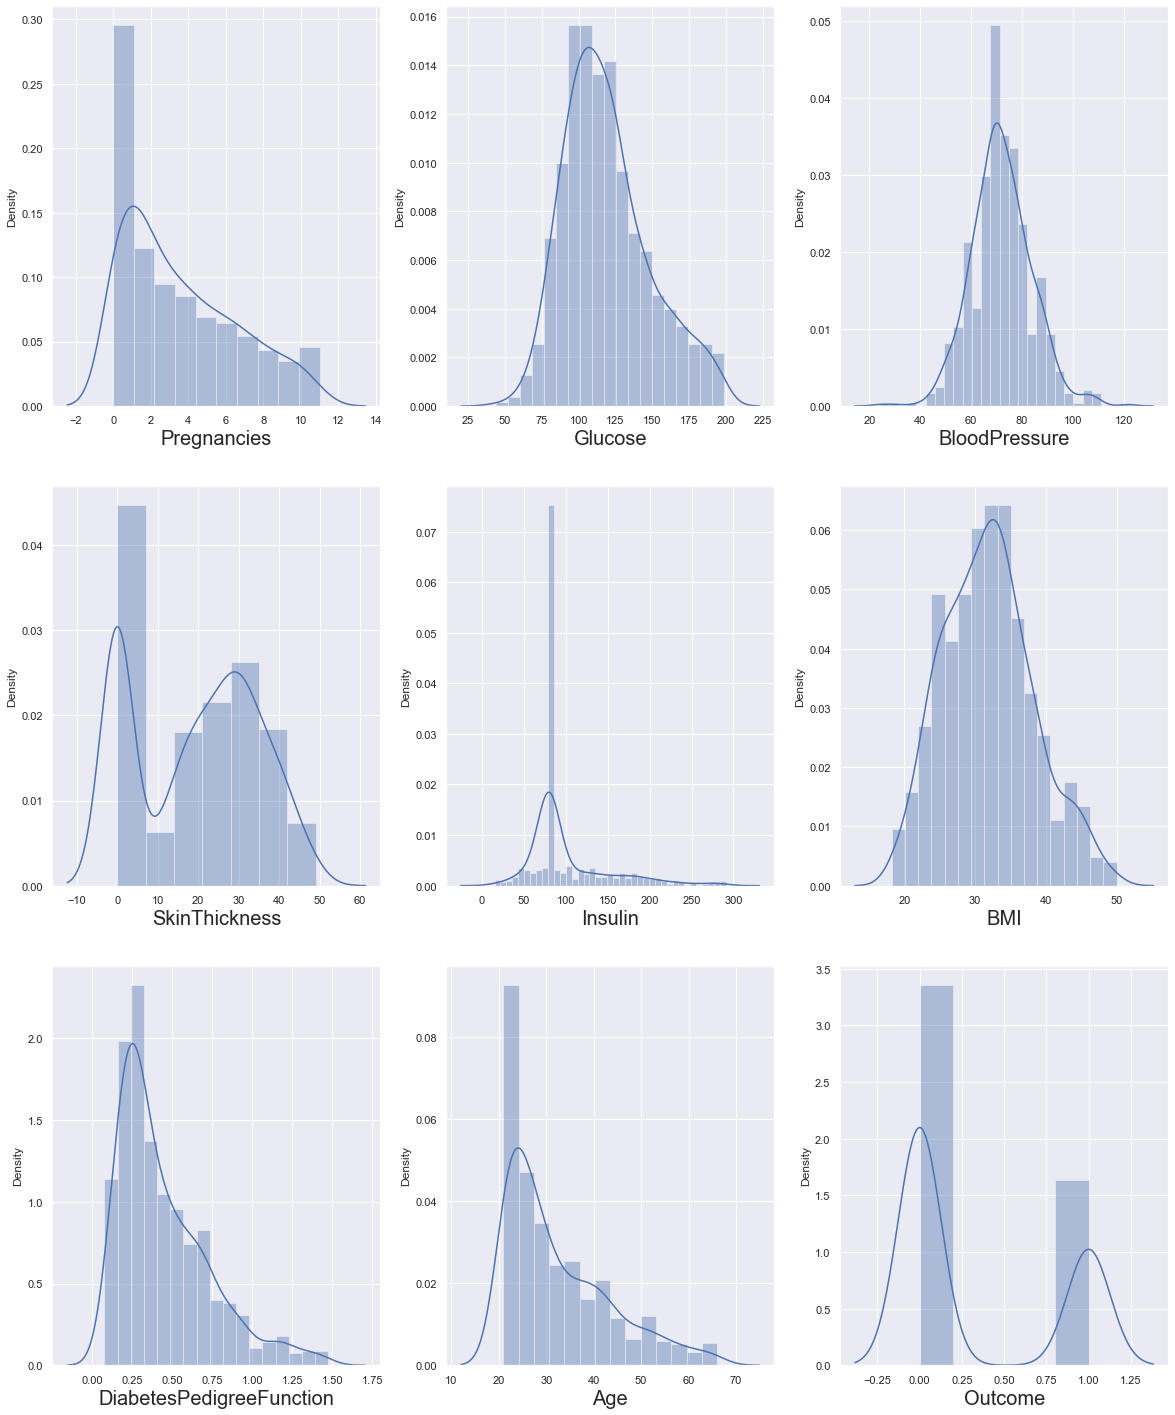

In [20]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [21]:
y = df.Outcome

In [22]:
x = df.drop('Outcome', axis=1)

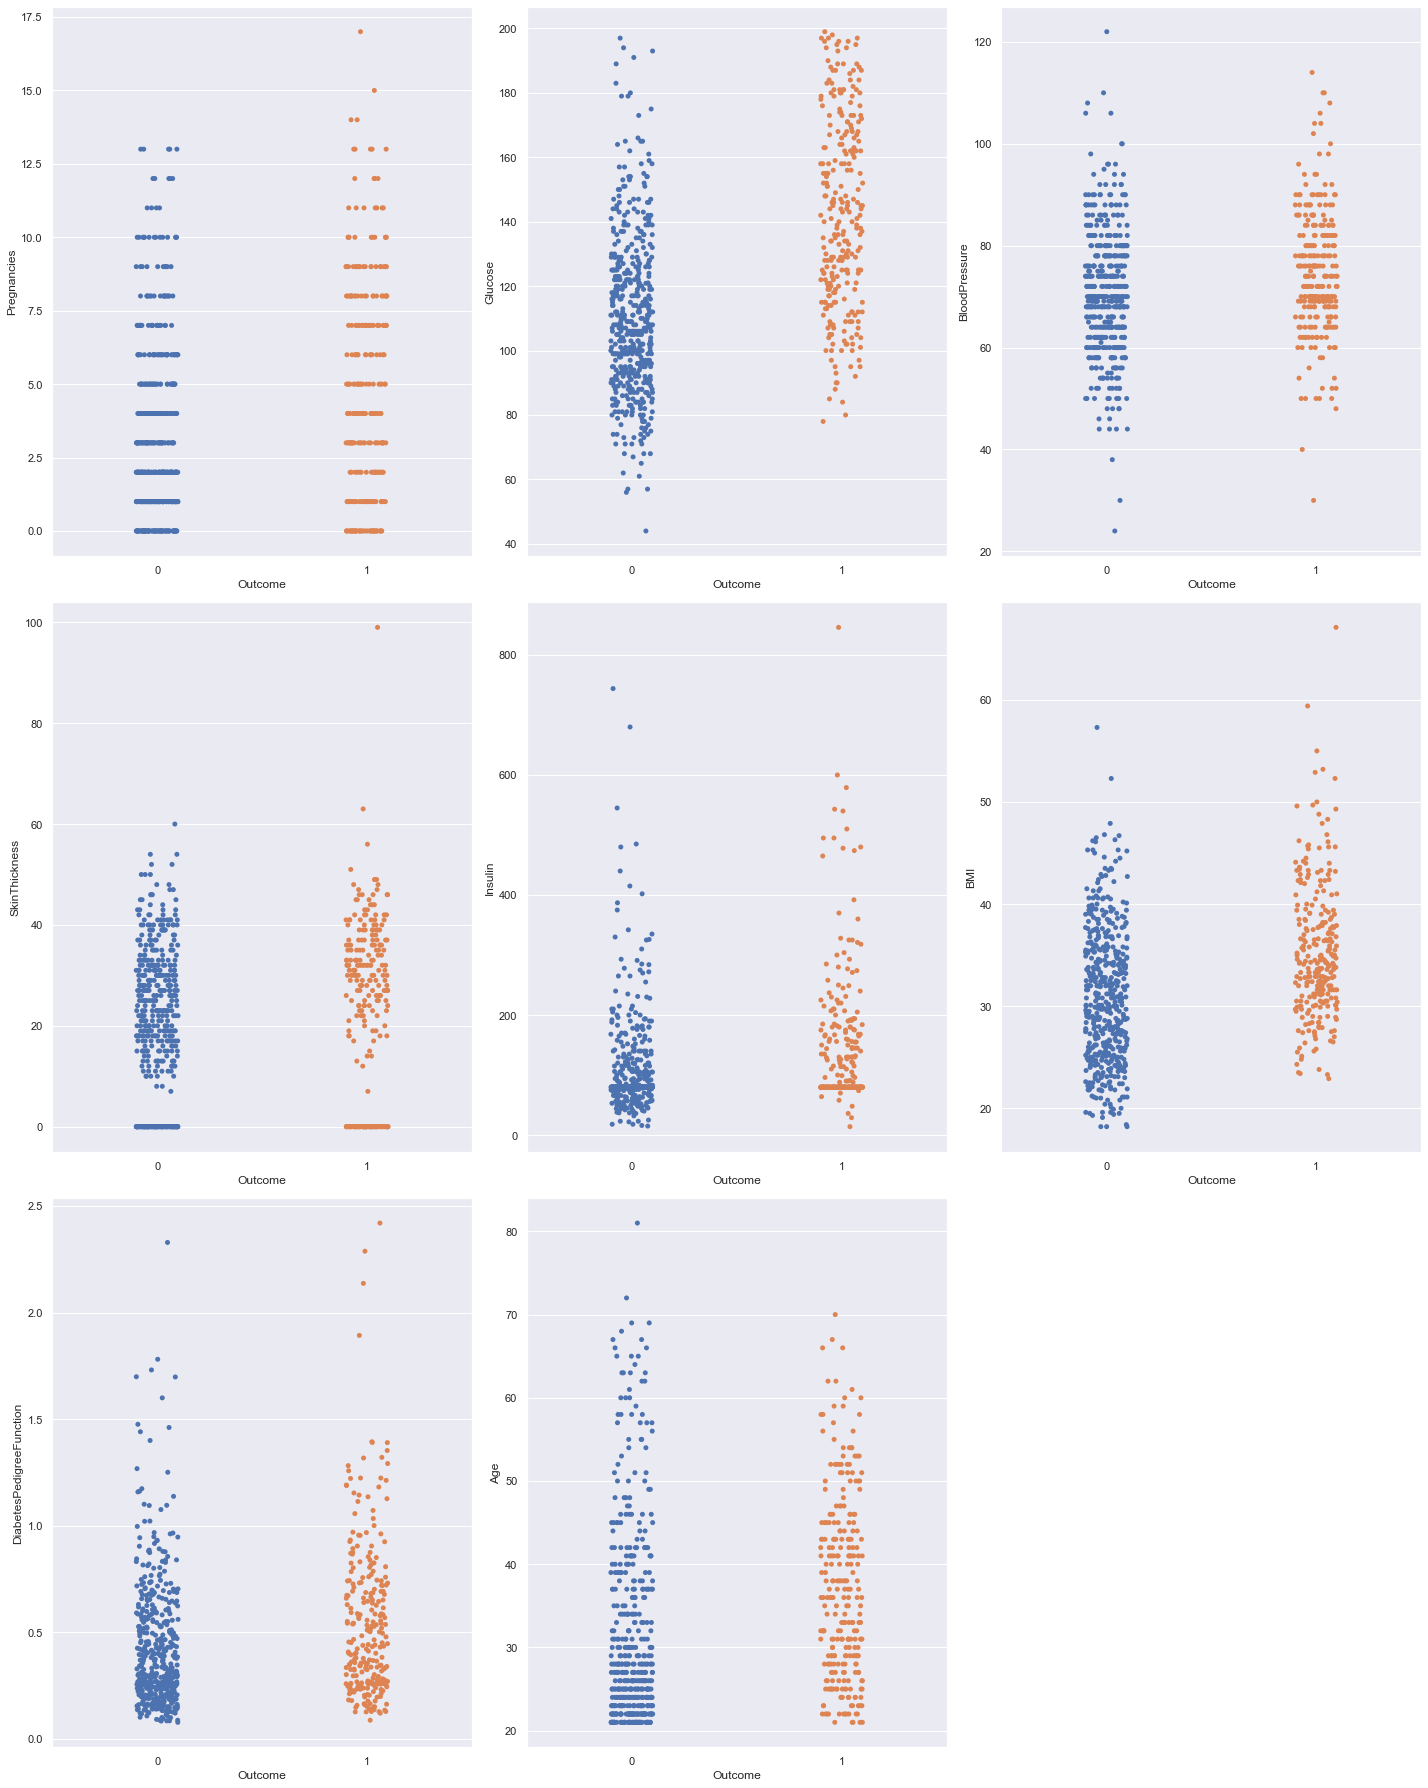

In [23]:
plt.figure(figsize=(20,25), facecolor='white')

n = 1

for i in x:
    if n<=9:
        ax = plt.subplot(3,3,n)
        sns.stripplot(y,x[i])
    n+=1
plt.tight_layout()

In [24]:
scaler = StandardScaler()

In [25]:
x_scaled = scaler.fit_transform(x)

In [26]:
vif = pd.DataFrame()

In [27]:
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [28]:
vif['feature'] = x.columns

In [29]:
vif

,vif,feature
0,1.431178,Pregnancies
1,1.357174,Glucose
2,1.248601,BloodPressure
3,1.308892,SkinThickness
4,1.321545,Insulin
5,1.334164,BMI
6,1.067705,DiabetesPedigreeFunction
7,1.617911,Age


In [30]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y,test_size=0.25)

In [31]:
knnc = KNeighborsClassifier()

In [32]:
knnc.fit(x_train,y_train)

KNeighborsClassifier()

In [33]:
y_pred = knnc.predict(x_test)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       123
           1       0.64      0.59      0.62        69

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.71       192
weighted avg       0.73      0.73      0.73       192



In [35]:
knnc.score(x_train,y_train)

0.8315972222222222

In [36]:
accuracy_score(y_test,y_pred)

0.734375

In [37]:
param_grid = {'algorithm':['ball_tree', 'kd_tree', 'brute'],
             'leaf_size':[18,20,25,27,30,32,34],
             'n_neighbors' : [3,5,7,9,10,11,12,13]}

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
grid_search = GridSearchCV(knnc,param_grid=param_grid,verbose=3)

In [40]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, l

[CV 1/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=3; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=3; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=3; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=3; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=3; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=5; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=5; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=5; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=5; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=5; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=7; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=27, n_neighbors=7; total time=   0.0s
[CV 3/5] END alg

[CV 1/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=5; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=5; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=5; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=5; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=5; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=7; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=7; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=7; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=7; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=7; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=9; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=9; total time=   0.0s
[CV 3/5] END alg

[CV 1/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13; total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13; total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13; total time=   0.0s
[CV 1/5] END .algorithm=kd_tree, leaf_size=25, n_neighbors=3; total time=   0.0s
[CV 2/5] END .algorithm=kd_tree, leaf_size=25, n_neighbors=3; total time=   0.0s
[CV 3/5] END .algorithm=kd_tree, leaf_size=25, n_neighbors=3; total time=   0.0s
[CV 4/5] END .algorithm=kd_tree, leaf_size=25, n_neighbors=3; total time=   0.0s
[CV 5/5] END .algorithm=kd_tree, leaf_size=25, n_neighbors=3; total time=   0.0s
[CV 1/5] END .algorithm=kd_tree, leaf_size=25, n_neighbors=5; total time=   0.0s
[CV 2/5] END .algorithm=kd_tree, leaf_size=25, n_neighbors=5; total time=   0.0s
[CV 3/5] END .algorithm=kd_t

[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=12; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=12; total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=12; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=12; total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=12; total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=13; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=13; total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=13; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=13; total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=13; total time=   0.0s
[CV 1/5] END .algorithm=kd_tree, leaf_size=32, n_neighbors=3; total time=   0.0s
[CV 2/5] END .algorithm=kd_tree, leaf_size=32, n_neighbors=3; total time=   0.0s
[CV 3/5] END .algorithm=kd_t

[CV 5/5] END ..algorithm=brute, leaf_size=18, n_neighbors=13; total time=   0.0s
[CV 1/5] END ...algorithm=brute, leaf_size=20, n_neighbors=3; total time=   0.0s
[CV 2/5] END ...algorithm=brute, leaf_size=20, n_neighbors=3; total time=   0.0s
[CV 3/5] END ...algorithm=brute, leaf_size=20, n_neighbors=3; total time=   0.0s
[CV 4/5] END ...algorithm=brute, leaf_size=20, n_neighbors=3; total time=   0.0s
[CV 5/5] END ...algorithm=brute, leaf_size=20, n_neighbors=3; total time=   0.0s
[CV 1/5] END ...algorithm=brute, leaf_size=20, n_neighbors=5; total time=   0.0s
[CV 2/5] END ...algorithm=brute, leaf_size=20, n_neighbors=5; total time=   0.0s
[CV 3/5] END ...algorithm=brute, leaf_size=20, n_neighbors=5; total time=   0.0s
[CV 4/5] END ...algorithm=brute, leaf_size=20, n_neighbors=5; total time=   0.0s
[CV 5/5] END ...algorithm=brute, leaf_size=20, n_neighbors=5; total time=   0.0s
[CV 1/5] END ...algorithm=brute, leaf_size=20, n_neighbors=7; total time=   0.0s
[CV 2/5] END ...algorithm=br

[CV 1/5] END ..algorithm=brute, leaf_size=27, n_neighbors=12; total time=   0.0s
[CV 2/5] END ..algorithm=brute, leaf_size=27, n_neighbors=12; total time=   0.0s
[CV 3/5] END ..algorithm=brute, leaf_size=27, n_neighbors=12; total time=   0.0s
[CV 4/5] END ..algorithm=brute, leaf_size=27, n_neighbors=12; total time=   0.0s
[CV 5/5] END ..algorithm=brute, leaf_size=27, n_neighbors=12; total time=   0.0s
[CV 1/5] END ..algorithm=brute, leaf_size=27, n_neighbors=13; total time=   0.0s
[CV 2/5] END ..algorithm=brute, leaf_size=27, n_neighbors=13; total time=   0.0s
[CV 3/5] END ..algorithm=brute, leaf_size=27, n_neighbors=13; total time=   0.0s
[CV 4/5] END ..algorithm=brute, leaf_size=27, n_neighbors=13; total time=   0.0s
[CV 5/5] END ..algorithm=brute, leaf_size=27, n_neighbors=13; total time=   0.0s
[CV 1/5] END ...algorithm=brute, leaf_size=30, n_neighbors=3; total time=   0.0s
[CV 2/5] END ...algorithm=brute, leaf_size=30, n_neighbors=3; total time=   0.0s
[CV 3/5] END ...algorithm=br

[CV 5/5] END ..algorithm=brute, leaf_size=34, n_neighbors=10; total time=   0.0s
[CV 1/5] END ..algorithm=brute, leaf_size=34, n_neighbors=11; total time=   0.0s
[CV 2/5] END ..algorithm=brute, leaf_size=34, n_neighbors=11; total time=   0.0s
[CV 3/5] END ..algorithm=brute, leaf_size=34, n_neighbors=11; total time=   0.0s
[CV 4/5] END ..algorithm=brute, leaf_size=34, n_neighbors=11; total time=   0.0s
[CV 5/5] END ..algorithm=brute, leaf_size=34, n_neighbors=11; total time=   0.0s
[CV 1/5] END ..algorithm=brute, leaf_size=34, n_neighbors=12; total time=   0.0s
[CV 2/5] END ..algorithm=brute, leaf_size=34, n_neighbors=12; total time=   0.0s
[CV 3/5] END ..algorithm=brute, leaf_size=34, n_neighbors=12; total time=   0.0s
[CV 4/5] END ..algorithm=brute, leaf_size=34, n_neighbors=12; total time=   0.0s
[CV 5/5] END ..algorithm=brute, leaf_size=34, n_neighbors=12; total time=   0.0s
[CV 1/5] END ..algorithm=brute, leaf_size=34, n_neighbors=13; total time=   0.0s
[CV 2/5] END ..algorithm=bru

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [41]:
print(grid_search.best_params_)

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 12}


In [42]:
new_knn = KNeighborsClassifier(n_neighbors=11,leaf_size=18,algorithm='ball_tree')

In [43]:
new_knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=11)

In [44]:
new_knn.score(x_train,y_train)

0.7934027777777778

In [45]:
new_knn.score(x_test,y_test)

0.734375

In [48]:
k_fold = KFold(n_splits=12)

In [49]:
k_fold

KFold(n_splits=12, random_state=None, shuffle=False)

In [50]:
k_fold.get_n_splits(x_scaled)

12

In [51]:
knn = KNeighborsClassifier(algorithm='ball_tree',leaf_size=18,n_neighbors=11)

In [59]:
from statistics import mean
cnt =0
count = []
train_score = []
test_score = []

for train_index,test_index in k_fold.split(x_scaled):
    x_train, x_test = x_scaled[train_index], x_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    knn.fit(x_train,y_train)
    train_score_ = knn.score(x_train,y_train)
    test_score_ =  knn.score(x_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
print("for k = ", cnt)
print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  12
train_score is :   0.7883522727272727 and test score is :   0.828125
************************************************
************************************************
Average train score is :   0.7881155303030303
Average test score is :   0.7565104166666666


In [60]:
k_fold.split(x_scaled)

<generator object _BaseKFold.split at 0x00000255F97323C0>

([<matplotlib.axis.YTick at 0x255f9f7e6a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

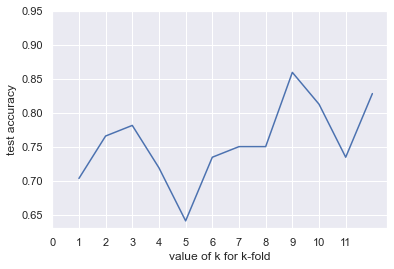

In [61]:
plt.plot(count,test_score)
plt.xlabel('value of k for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 12, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05)) 

In [62]:
import pickle

In [64]:
with open('knn_final_model.sav', 'wb') as f:
    pickle.dump(knn,f)

In [ ]:
with open('standard_scaler')